# Table of Contents
 <p><div class="lev1"><a href="#Project-description"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></div><div class="lev1"><a href="#Premodeling"><span class="toc-item-num">2&nbsp;&nbsp;</span>Premodeling</a></div><div class="lev2"><a href="#Data-load"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data load</a></div><div class="lev2"><a href="#Data-description"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data description</a></div><div class="lev2"><a href="#Data-visualization"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data visualization</a></div><div class="lev3"><a href="#Frequency-chats-and-histograms"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Frequency chats and histograms</a></div><div class="lev3"><a href="#Box-plots"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Box plots</a></div><div class="lev2"><a href="#Making-dummy-vars"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Making dummy vars</a></div><div class="lev1"><a href="#Modeling"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2"><a href="#Performing-the-regression"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Performing the regression</a></div><div class="lev3"><a href="#Odds-ratio"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Odds ratio</a></div><div class="lev1"><a href="#Post-modeling"><span class="toc-item-num">4&nbsp;&nbsp;</span>Post modeling</a></div><div class="lev2"><a href="#Accuracy-evaluation-with-ROC-curve"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Accuracy evaluation with ROC curve</a></div><div class="lev2"><a href="#Sensitivity-analysis"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sensitivity analysis</a></div><div class="lev3"><a href="#Data-preprocessing"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Data preprocessing</a></div><div class="lev3"><a href="#Visualization"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Visualization</a></div><div class="lev2"><a href="#Admission-chance-interactive-chart"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Admission chance interactive chart</a></div>

# Project description

- Code source:
http://blog.yhat.com/posts/logistic-regression-and-python.html

In [1]:
# almost all these packeges comes wiht anaconda
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # need to install it: in a command line type 'conda install seaborn' or 'pip install seaborn'
from sklearn.metrics import roc_curve
from ipywidgets import *

# Premodeling

## Data load

In [2]:
# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
df.columns = ["admit", "gre", "gpa", "prestige"]
print ('Number of rows: ', df.shape[0])
print ('Number of cols: ', df.shape[1])
df.head()

Number of rows:  400
Number of cols:  4


,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Data description

In [3]:
df.describe().T # I think it looks a bit better when transposed

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
prestige,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


Number of admitted students vs. not admitted by institution prestige

In [4]:
 pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


##  Data visualization

### Frequency chats and histograms

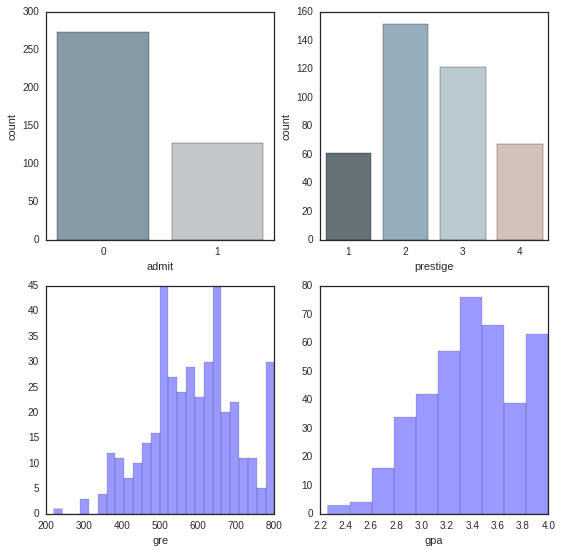

In [5]:
sns.set(style="white")
f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=False)
sns.countplot(x="admit", data=df,palette="RdBu_d",ax=axes[0, 0])
sns.countplot(x="prestige", data=df,palette="RdBu_d",ax=axes[0, 1])
sns.distplot(df[['gre']],color='b',kde=False, bins=25,ax=axes[1, 0],axlabel='gre')
sns.distplot(df[['gpa']],color='b',kde=False, bins=10,ax=axes[1, 1],axlabel='gpa')

### Box plots

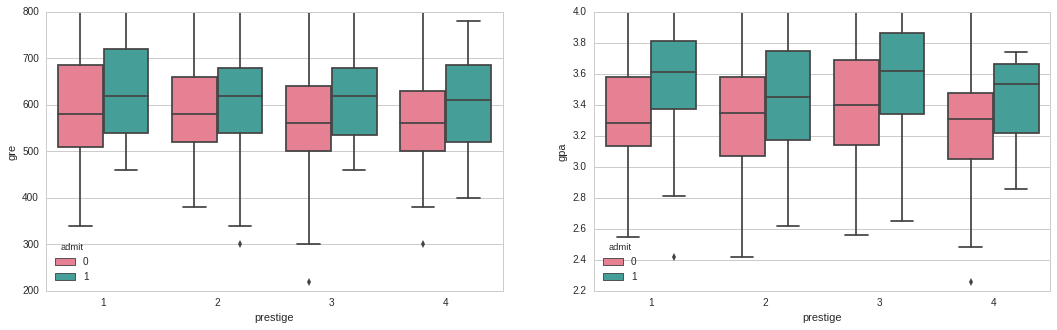

In [6]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=False)
sns.boxplot(x="prestige", y="gre", hue="admit",data=df,palette="husl",ax=axes[0])
sns.boxplot(x="prestige", y="gpa", hue="admit",data=df,palette="husl",ax=axes[1])

## Making dummy vars
In source code, the author uses quite cumbersome way. It can be done much easier

In [7]:
df.prestige=df.prestige.astype(str)# set this var as strig

#this func creat dummies from all cater vars and it uses var name as prefix 
data=pd.get_dummies(df).drop('prestige_1', axis=1) 
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0.0,1.0,0.0,1.0
1,1,660,3.67,0.0,1.0,0.0,1.0
2,1,800,4.00,0.0,0.0,0.0,1.0
3,1,640,3.19,0.0,0.0,1.0,1.0
4,0,520,2.93,0.0,0.0,1.0,1.0


# Modeling 

## Performing the regression

In [8]:
train_cols=data.columns[1:]
# it was a bit confusin because they added 'intercept' column, but don't use it later
print ('train_cols: ', train_cols.tolist())
print (' ')
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()
print (' ')
print (result.summary())
print (' ')
print ('Confidence interval of each coeffecient')
print (result.conf_int())

train_cols:  ['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4', 'intercept']
 
Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
 
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 May 2016   Pseudo R-squ.:                 0.08292
Time:                        10:50:16   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023

### Odds ratio

In [9]:
params = result.params
conf = result.conf_int()
conf['Odd Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odd Ratio']
print (np.exp(conf))

                2.5%     97.5%  Odd Ratio
gre         1.000120  1.004418   1.002267
gpa         1.166122  4.281877   2.234545
prestige_2  0.273692  0.946358   0.508931
prestige_3  0.133055  0.515089   0.261792
prestige_4  0.093443  0.480692   0.211938
intercept   0.001981  0.172783   0.018500


# Post modeling

## Accuracy evaluation with ROC curve

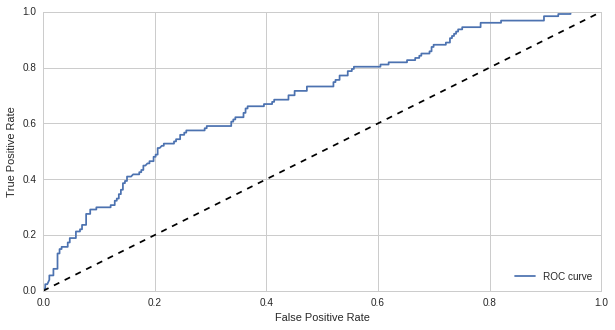

In [10]:
falsePositiveRate,truePositiveRate,tresh=roc_curve( data['admit'],
                                                   result.predict(data[train_cols]))
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(falsePositiveRate, truePositiveRate, label='ROC curve' )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Sensitivity analysis

### Data preprocessing

In [11]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
# enumerate all possibilities
'''on a source code, author used cartasion, which is excessive and 
confusing, also it gives warnings. I am using simple list comprehension to make combinations '''

combos = pd.DataFrame([(gr,gp, prest,1) for gr in gres for gp in gpas for prest in [1,2,3,4]])
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos['school prestige']=combos.prestige
combos.prestige=combos.prestige.astype(int).astype(str)
combos=pd.get_dummies(combos).drop('prestige_1', axis=1)
combos['admit_pred'] = result.predict(combos[train_cols])
combos.head()

,gre,gpa,intercept,school prestige,prestige_2,prestige_3,prestige_4,admit_pred
0,220.0,2.260000,1,1,0.0,0.0,0.0,0.157801
1,220.0,2.260000,1,2,1.0,0.0,0.0,0.087056
2,220.0,2.260000,1,3,0.0,1.0,0.0,0.046758
3,220.0,2.260000,1,4,0.0,0.0,1.0,0.038194
4,220.0,2.453333,1,1,0.0,0.0,0.0,0.179574


### Visualization

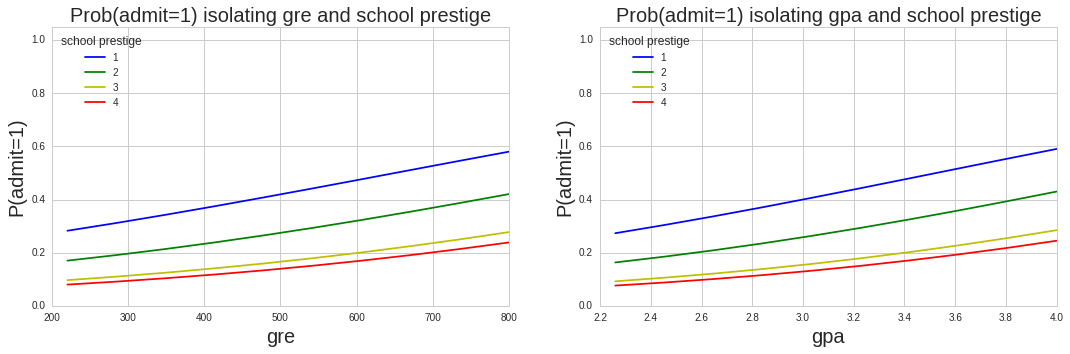

In [12]:
f, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=False)
def isolate_and_plot(variable):
    if variable=='gre':
        loc=0
    else:
        loc=1

    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'school prestige'],
                           aggfunc=np.mean)
  
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos['school prestige'].unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        axes[loc].plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])
    axes[loc].set_ylim([0.0, 1.05]) 
    axes[loc].set_xlabel(variable,size=20)
    axes[loc].set_ylabel("P(admit=1)",size=20)
    axes[loc].set_title("Prob(admit=1) isolating " + variable + " and school prestige",size=20)
    axes[loc].legend(['1', '2', '3', '4'], loc='upper left', title='school prestige')

isolate_and_plot('gre')
isolate_and_plot('gpa')

## Admission chance interactive chart

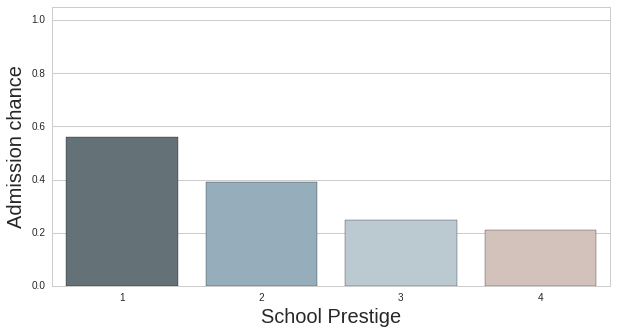

In [13]:
def chances(GRE,GPA):
    combos=pd.DataFrame([(GRE,GPA, prest,1) for prest in [1,2,3,4]])    
    combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
    combos['school prestige']=combos.prestige
    combos.prestige=combos.prestige.astype(int).astype(str)
    combos=pd.get_dummies(combos).drop('prestige_1', axis=1)
    combos['admit_pred'] = result.predict(combos[train_cols])
    plt.figure(figsize=(10, 5), )
    plt.ylim([0.0, 1.05])    
    sns.barplot(x="school prestige", y="admit_pred",data=combos,ci='None',palette="RdBu_d")
    plt.ylabel("Admission chance", size=20)
    plt.xlabel("School Prestige", size=20)
interact(chances,GRE=[200,800],GPA=[1.1,4.0])